# Digit recognition
#### Objective:
- Recognise digits from 28x28 pixel pictures

#### Model:
- Neural network via Keras

### Import of necessary packages 

In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical

### Lecture of the dataset

In [188]:
#path to dataset
#CHANGE AS NEEDED
df = pd.read_csv (r'C:\Users\phili\Documents\Machine Learning\Kaggle\Digit Recognizer\train.csv')

- Size and 10 first lines of the dataset

In [189]:
print("Size of the dataset:",df.shape)
df.head(10)

Size of the dataset: (42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- There are 784 pixel columns since the images are 28x28 pixels and the label column 

In [190]:
df.dtypes.astype(str).value_counts()

int64    785
dtype: int64

### Digit visualisation

- Definition of a function plotting a digit

In [191]:
def plotadigit(adigit):
    adigit_image = adigit.values.reshape(28,28) # reshape to square
    plt.imshow(adigit_image,cmap = plt.cm.binary,interpolation="nearest")
    plt.axis("off")
    plt.show()

- Plot a random digit

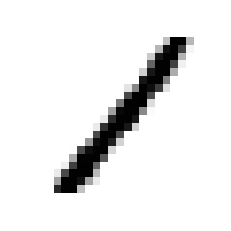

The label of this row is  1


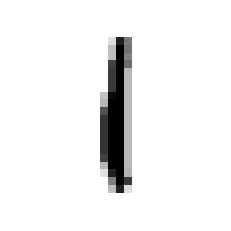

The label of this row is  1


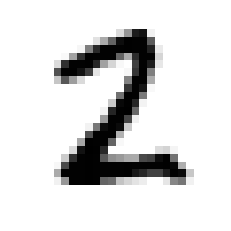

The label of this row is  2


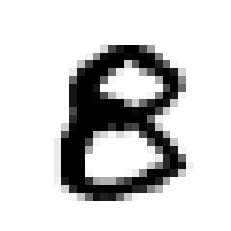

The label of this row is  8


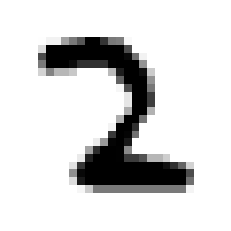

The label of this row is  2


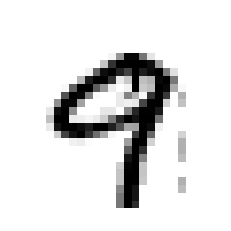

The label of this row is  9


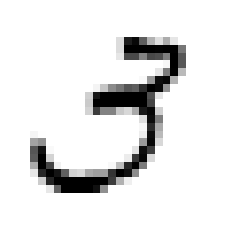

The label of this row is  3


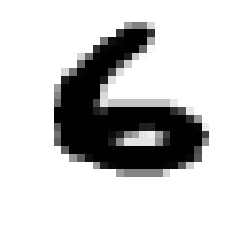

The label of this row is  6


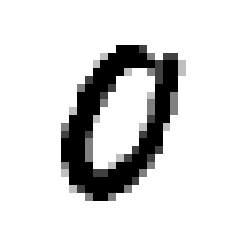

The label of this row is  0


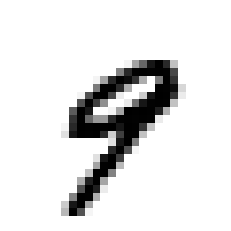

The label of this row is  9


In [192]:
for i in range(10):
    rand=random.sample(range(0, df.shape[0]), 1)[0]
    plotadigit(df.iloc[rand,1:])
    print("The label of this row is ",df.iloc[rand,:1][0])

- Check if the repartition of the ten digits if correct

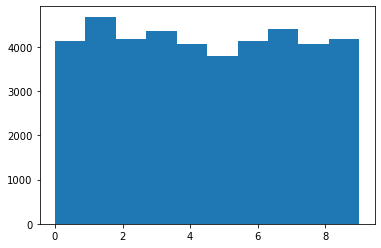

In [193]:
plt.hist(df["label"], bins=10)
plt.show()

- Separate between X and y

In [194]:
y=df["label"].values
df=df.loc[:, df.columns != "label"]

- Split train and test sets

In [195]:
# Stratification to be sure that every digit is distributed equally in both test and train sets
X_train, X_test, y_train, y_test = train_test_split(df, y,test_size=0.3,stratify=y)

### Neural network

- Initialisation of the model

In [196]:
model = Sequential([
   Dense(1000, activation='relu', input_shape=(784,)),
   Dense(1000, activation='relu'),
   Dropout(rate=0.05),
   Dense(1000, activation='relu'),
   Dense(10, activation='softmax')
])
model.compile(
   optimizer='Adam',
   loss='categorical_crossentropy',
   metrics=['accuracy']
)

- Fit of the model

In [197]:
model.fit(
   x=X_train,
   y=to_categorical(y_train),
   epochs=10,
   batch_size=64,
   shuffle=True
)

Epoch 1/10
460/460 [==============================] - 13s 23ms/step - loss: 9.9535 - accuracy: 0.8102
Epoch 2/10
460/460 [==============================] - 12s 26ms/step - loss: 0.1949 - accuracy: 0.9481
Epoch 3/10
460/460 [==============================] - 12s 27ms/step - loss: 0.1292 - accuracy: 0.9619
Epoch 4/10
460/460 [==============================] - 13s 28ms/step - loss: 0.1239 - accuracy: 0.9647
Epoch 5/10
460/460 [==============================] - 12s 26ms/step - loss: 0.1308 - accuracy: 0.9666
Epoch 6/10
460/460 [==============================] - 12s 26ms/step - loss: 0.0843 - accuracy: 0.9757
Epoch 7/10
460/460 [==============================] - 12s 27ms/step - loss: 0.0906 - accuracy: 0.9751
Epoch 8/10
460/460 [==============================] - 12s 27ms/step - loss: 0.1041 - accuracy: 0.9726
Epoch 9/10
460/460 [==============================] - 13s 28ms/step - loss: 0.1133 - accuracy: 0.9725
Epoch 10/10
460/460 [==============================] - 13s 27ms/step - loss: 0.087

- Evaluation of the model on train and test sets

In [198]:
ev=model.evaluate(X_train, to_categorical(y_train))
print("On the train the loss is",ev[0],"and the accuracy is",ev[1])
ev=model.evaluate(X_test, to_categorical(y_test))
print("On the test the loss is",ev[0],"and the accuracy is",ev[1])

919/919 [==============================] - 11s 7ms/step - loss: 0.0897 - accuracy: 0.9764
On the train the loss is 0.08967015147209167 and the accuracy is 0.9764285683631897
394/394 [==============================] - 6s 7ms/step - loss: 0.2456 - accuracy: 0.9557
On the test the loss is 0.24557457864284515 and the accuracy is 0.9557142853736877


- Prediction on the test set

In [199]:
predictions = model.predict(X_test)

- Plot of some test digits and comparison between their labels and class predictions

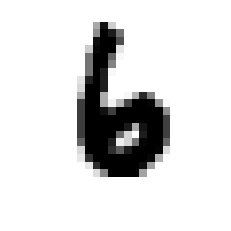

The label of this test is 6 and the prediction of this test is 6


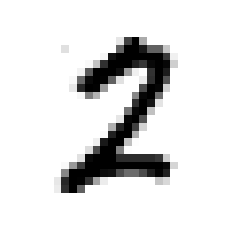

The label of this test is 2 and the prediction of this test is 2


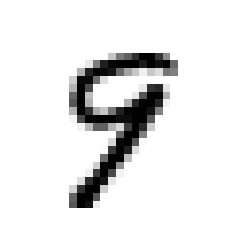

The label of this test is 9 and the prediction of this test is 9


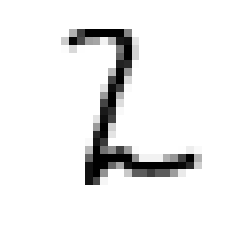

The label of this test is 2 and the prediction of this test is 2


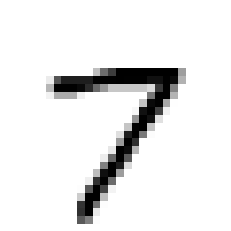

The label of this test is 7 and the prediction of this test is 7


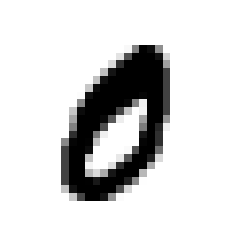

The label of this test is 0 and the prediction of this test is 0


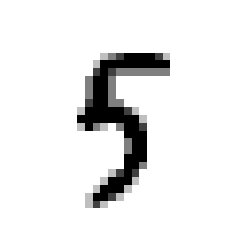

The label of this test is 5 and the prediction of this test is 9


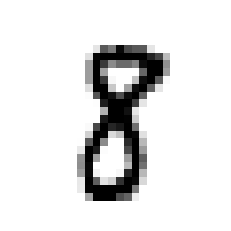

The label of this test is 8 and the prediction of this test is 8


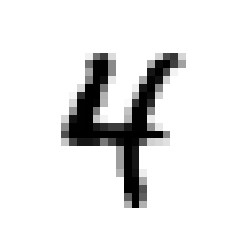

The label of this test is 4 and the prediction of this test is 4


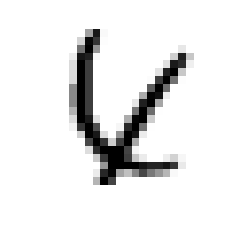

The label of this test is 4 and the prediction of this test is 6


In [200]:
for i in range(10):
    rand=random.sample(range(0, X_test.shape[0]), 1)[0]
    plotadigit(X_test.iloc[rand,:])    
    print("The label of this test is",y_test[rand],"and the prediction of this test is",max( (v, i) for i, v in enumerate(predictions[rand]) )[1])